In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('survey.csv')
print(df.head())


             Timestamp  Age  Gender         Country state self_employed  \
0  2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1  2014-08-27 11:29:37   44       M   United States    IN           NaN   
2  2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3  2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4  2014-08-27 11:30:22   31    Male   United States    TX           NaN   

  family_history treatment work_interfere    no_employees   ...     \
0             No       Yes          Often            6-25   ...      
1             No        No         Rarely  More than 1000   ...      
2             No        No         Rarely            6-25   ...      
3            Yes       Yes          Often          26-100   ...      
4             No        No          Never         100-500   ...      

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy                        No      

### Introduction

This data set was procured from Kaggle.com.

There are a number of columns in this data set which explores mental health through a number of employees within an industry. There are many factors here including those which shows how a company deals with mental health issues in regards to insurance, leave time etc. For the most part we will be ignoring this information to look at the information of the employees themselves and how they deal with their own mental health issues. 

### The Problem

When employers are hiring potentinal employees it is important to know all potential current and future health problems. This is important for a number of reasons, from providing health care, to being able to predict when employees will not be able to work. Mental health risks pose problems for both the employer and employee if not properly diagnosed and dealt with. Is there a way that would make it easier to predict which employees would be more susceptible to mental health treatment?

The first variable we wanted to look at as a possible predictor of mental health issues was family history. 

In [133]:
df.groupby('family_history').count()

,Timestamp,Age,Gender,Country,state,self_employed,treatment,work_interfere,no_employees,remote_work,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
family_history,,,,,,,,,,,,,,,,,,,,,
No,767,767,767,767,419,756,767,546,767,767,...,767,767,767,767,767,767,767,767,767,75
Yes,492,492,492,492,325,485,492,449,492,492,...,492,492,492,492,492,492,492,492,492,89


In [134]:
df.groupby('treatment').count()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,work_interfere,no_employees,remote_work,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
treatment,,,,,,,,,,,,,,,,,,,,,
No,622,622,622,622,337,613,622,362,622,622,...,622,622,622,622,622,622,622,622,622,58
Yes,637,637,637,637,407,628,637,633,637,637,...,637,637,637,637,637,637,637,637,637,106


In [135]:
fam_treatment = df[(df['treatment']=='Yes') & (df['family_history']=='Yes')]
fam_treatment.count()

Timestamp                    365
Age                          365
Gender                       365
Country                      365
state                        247
self_employed                360
family_history               365
treatment                    365
work_interfere               364
no_employees                 365
remote_work                  365
tech_company                 365
benefits                     365
care_options                 365
wellness_program             365
seek_help                    365
anonymity                    365
leave                        365
mental_health_consequence    365
phys_health_consequence      365
coworkers                    365
supervisor                   365
mental_health_interview      365
phys_health_interview        365
mental_vs_physical           365
obs_consequence              365
comments                      71
dtype: int64

In [144]:
fam_no_treatment = df[(df['treatment']=='No') & (df['family_history']=='Yes')]
#fam_no_treatment.count() 127

In [141]:
no_fam_no_treatment =df[(df['treatment']=='No') & (df['family_history']=='No')]
#no_fam_no_treatment.count() 495

In [140]:
no_fam_treatment = df[(df['treatment']=='Yes') & (df['family_history']=='No')]
#no_fam_treatment.count() 272

In [143]:
industry_treatment = df[(df['treatment']=='Yes')& (df['tech_company']=='Yes')]
#industry_treatment.count() 514

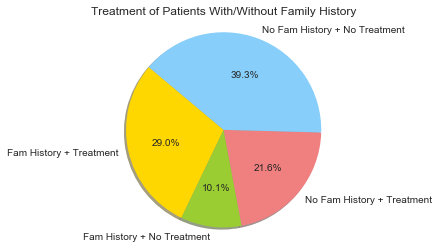

In [47]:
labels = 'Fam History + Treatment', 'Fam History + No Treatment', 'No Fam History + Treatment', 'No Fam History + No Treatment'
sizes = [365, 127, 272, 495]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
 

plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Treatment of Patients With/Without Family History') 
plt.axis('equal')
plt.show()

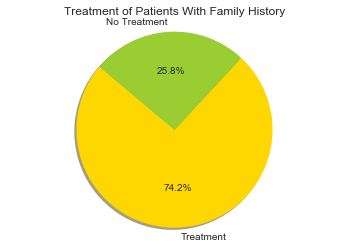

In [48]:
labels = 'Treatment', 'No Treatment'
sizes = [365, 127]
colors = ['gold', 'yellowgreen']
 

plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Treatment of Patients With Family History') 
plt.axis('equal')
plt.show()

When looking at the two pie charts above we can see that among patients with a family history almost 75% received treatment for mental health issues. 29% of the about 50% of employees surveyed who received treatment had family history, again indicating that family history seems to be a good predictor of current day issues. I think this can be a valuable asset for employers and employees. Our study will look deeper into this variable.

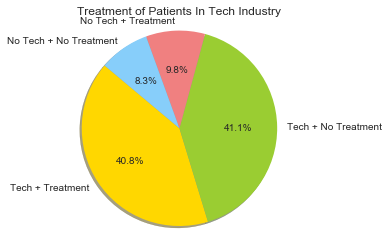

In [56]:
labels = 'Tech + Treatment', 'Tech + No Treatment', 'No Tech + Treatment', 'No Tech + No Treatment'
sizes = [514, 517, 123, 105]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
 

plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Treatment of Patients In Tech Industry') 
plt.axis('equal')
plt.show()

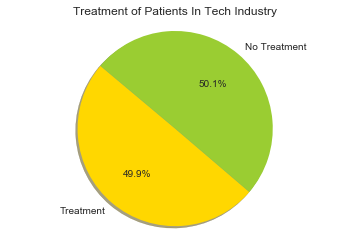

In [58]:
labels = 'Treatment',  'No Treatment', 
sizes = [514, 517]
colors = ['gold', 'yellowgreen',]
 

plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Treatment of Patients In Tech Industry') 
plt.axis('equal')
plt.show()

After looking at the data from the tech industry there is no difference for treamtment inside or outside of the industry. We decide not to test this variable. For continued further study one can look to test different industries and how they affect mental health treatment.

In [125]:
df['female'] = df.Gender.apply(lambda x: 1 if x.lower()[0] =='f'  else 0 )
#Many respondents would put F or f or female for gender. This will classify all these responses as females.

In [116]:
df['age_bins']=df.Age.apply(lambda x: 1 if x< 20 else(2 if x<30 else (3 if x<40 else (4 if x<50 else 5))))
#We are taking the ages and putting them into 5 bins to make the data easier to work with.

In [117]:
age=df['age_bins']
age.value_counts()

3    554
2    500
4    149
5     34
1     22
Name: age_bins, dtype: int64

The vast majority of new employees fall into the 20-40 range. This is expected as most new employees are hired from this age range. Still however it will be important for companies to be aware of risks when hiring uncommonly young or old employees. Since we don't have enough data on outlier employees to accurately test that information here, we will request that it is tested in the experiment. 

In [130]:
df['treatment']=df.treatment.apply(lambda x: 1 if x=='Yes' else  0)
df['family_history']=df.family_history.apply(lambda x: 1 if x=='Yes' else  0)
#We are translating yes/no in our data to 1 0 to better see correlation. 

In [127]:
new = df.filter(['female','age_bins','family_history','treatment'], axis=1)
print(new)

      female  age_bins  family_history  treatment
0          1         3               0          1
1          0         4               0          0
2          0         3               0          0
3          0         3               1          1
4          0         3               0          0
5          0         3               1          0
6          1         3               1          1
7          0         3               0          0
8          1         4               1          1
9          0         2               0          0
10         0         3               0          1
11         0         2               0          0
12         1         4               1          1
13         0         3               1          0
14         0         2               0          0
15         1         2               1          1
16         0         2               0          1
17         0         3               0          1
18         0         4               1          0


In [128]:
corrframe = pd.DataFrame(new.corr())
corrframe
#Here we can see the correlation between our three variables we wish to test and treatment. 

,female,age_bins,family_history,treatment
female,1.000000,-0.067625,0.138573,0.183058
age_bins,-0.067625,1.000000,0.020138,0.075196
family_history,0.138573,0.020138,1.000000,0.377918
treatment,0.183058,0.075196,0.377918,1.000000


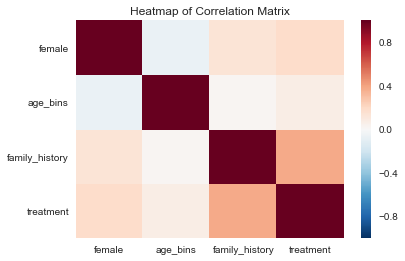

In [129]:
sns.heatmap(corrframe)
sns.plt.title('Heatmap of Correlation Matrix')

By looking at our correlation matrix we once again see that family history and treatment are closely related. We can also see that being a female also seems to correlate with receiving mental health treatment. Again it is important to keep in mind this number does not mean females suffer more from mental illness, but rather that they seek treatment more often than males. Our age bins show very little correlation, but this can be expected based on the uneven distribution. As we stated before it will still be valuable to test the age variable in our actual experiment. 


### Hypothesis

By identifying certain factors such as family history, age, and gender employers and employees can more accurately predict future mental health issues. 


### Procedure
Conduct three A/B tests independently on three variables age, gender and family history and conduct two proportion Z test. The goal of this proposed experiment is to understand the impact of each variable on having mental issues. Note, this will be a long term experiment, can take a few years until the observed effect.

Our first hypothesis would be that females undergo treatment at a higher rate than male. It is important to note that this does not necessarily mean they suffer more mental illnesses than men, but rather simply that they seek treatment more often. To test this hypothesis we would take a control group of male new employees and an experimental group of female new employees. Ideally these new employees would be working at the same company, or at least same industry or location, and be around the same age. After a period of a few years or so we can track employees and see which group has the higher rate of mental health treatment.

Our second hypothesis would be that employees who fall into age bins 1-2 seek treatment at a higher rate than those who fall into 3-5. In this example our control group would be mostly older new employees and our experimental group would be mostly younger new employees. Again ideally they would all be working for the same company with the same conditions and both groups would have both males and females.

Our thid hypothesis indicates that employees with a family history would be more likely to seek treatment than those with out. This experiment would be a little trickier, requiring new employees to fill out a survey about their family history. After the survey was filled out the control group would be the new employees without a family history and the experimental group would be those with a family history. Again keeping the other variables as similar as possible. 


### Testing
Two Samples z-test for Proportions
z=p1^−p2^p̂ (1−p̂ )(1n1+1n2)√z=p1^−p2^p^(1−p^)(1n1+1n2)
where
p1^=x1n1,p2^=x2n2p1^=x1n1,p2^=x2n2 
p̂ =x1+x2n1+n2p^=x1+x2n1+n2 
x1,x2x1,x2  - number of employees with treament in group 1 and 2
n1,n2n1,n2  - number of employees sampled in group 1 and 2

We perform the experiment, find our Z-statistic, and look up the corresponding p-value to determine whether we reject or fail to reject the null hypothesis. We can have the set up to test other variables such as age and gender.

### Success

What would define a success in this experiment would be that if after the z testing was done our hypothesis were all proved to be accurate. This would give us a much more detailed idea of what factors lead to new employees seeking mental treatment. Again this would benefit both the employers and the employees as both are able to plan for the future with more ease than before. If treatments become more predictable employers can allot specific health insurance benefits for their employees or be able to plan out time away from the office on a more accurate basis. Employees will also benefit as they will be able to seek employers which better suit their mental health needs.